In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2

## Eigen value
from sklearn.decomposition import PCA

import pickle

In [3]:
data = pickle.load(open('./data/data_image_100_100.pickle',mode='rb'))

In [4]:
data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_9991,pixel_9992,pixel_9993,pixel_9994,pixel_9995,pixel_9996,pixel_9997,pixel_9998,pixel_9999,gender
0,0.737255,0.713725,0.713725,0.725490,0.682353,0.709804,0.752941,0.705882,0.850980,0.854902,...,0.435294,0.450980,0.454902,0.478431,0.454902,0.470588,0.466667,0.458824,0.431373,female
1,0.125490,0.090196,0.121569,0.105882,0.109804,0.117647,0.109804,0.129412,0.141176,0.117647,...,0.184314,0.105882,0.133333,0.086275,0.105882,0.090196,0.145098,0.247059,0.070588,female
2,0.192157,0.192157,0.137255,0.133333,0.164706,0.156863,0.137255,0.152941,0.278431,0.243137,...,0.901961,0.905882,0.929412,0.933333,0.901961,0.862745,0.831373,0.823529,0.815686,female
3,0.517647,0.474510,0.462745,0.380392,0.333333,0.360784,0.356863,0.431373,0.607843,0.635294,...,0.435294,0.243137,0.243137,0.258824,0.317647,0.352941,0.392157,0.423529,0.443137,female
4,0.917647,0.917647,0.917647,0.894118,0.905882,0.803922,0.478431,0.384314,0.290196,0.211765,...,0.952941,0.929412,0.929412,0.937255,0.929412,0.925490,0.945098,0.933333,0.941176,female


In [5]:
### Eigen Face

In [8]:
# Mean Face

X = data.drop('gender',axis=1).values

In [9]:
X.shape

(4558, 10000)

In [10]:
mean_face = X.mean(axis=0) # flatten mean face
mean_face.shape

(10000,)

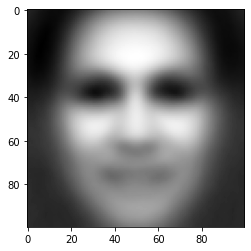

In [11]:
plt.imshow(mean_face.reshape((100,100)),cmap = 'gray')

### subtract data with mean face

In [13]:
X_t = X - mean_face # transformed data

In [14]:
#PCA

pca = PCA(n_components = None, whiten = True, svd_solver = "auto")
pca.fit(X_t)

PCA(whiten=True)

In [17]:
exp_var_df = pd.DataFrame()
exp_var_df['explained_var'] = pca.explained_variance_ratio_
exp_var_df['cum_explained_var'] = exp_var_df['explained_var'].cumsum()
exp_var_df['principle_components'] = np.arange(1,len(exp_var_df)+1)

exp_var_df.head()

,explained_var,cum_explained_var,principle_components
0,0.251950,0.251950,1
1,0.115845,0.367795,2
2,0.104294,0.472090,3
3,0.051998,0.524088,4
4,0.032963,0.557051,5


In [18]:
exp_var_df.set_index('principle_components',inplace=True)

<AxesSubplot:xlabel='principle_components'>

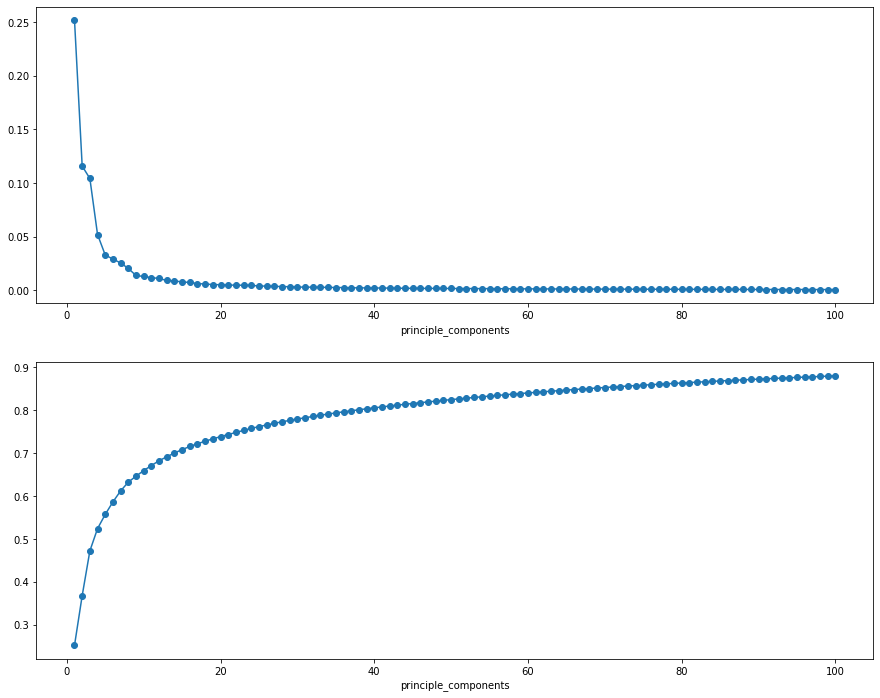

In [20]:
fig,ax = plt.subplots(nrows=2,figsize=(15,12))

exp_var_df['explained_var'].head(100).plot(kind='line',marker='o',ax=ax[0])
exp_var_df['cum_explained_var'].head(100).plot(kind='line',marker='o',ax=ax[1])


#### from the above plot, it is clear that approximately 50 principle components have 80% coverage

In [22]:
pca_50 = PCA(n_components = 50,whiten=True, svd_solver = 'auto')
pca_data = pca_50.fit_transform(X_t)

In [24]:
# saving the data and models
y = data['gender'].values
np.savez('./data/dat_pca_50_target',pca_data,y)

In [25]:
# saving the model
pca_dict = {'pca':pca_50,'mean_face':mean_face}

In [26]:
pickle.dump(pca_dict,open('model/pca_dict.pickle','wb'))

In [27]:
pca_data.shape

(4558, 50)

### Visualize Eigen Image

In [29]:
pca_data_inv = pca_50.inverse_transform(pca_data)

In [30]:
pca_data_inv.shape

(4558, 10000)

In [34]:
eig_img = pca_data_inv[1,:].reshape((100,100))
eig_img.shape

(100, 100)

(-0.5, 99.5, 99.5, -0.5)

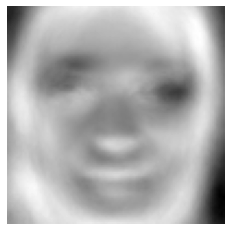

In [35]:
plt.imshow(eig_img,cmap='gray')
plt.axis('off')

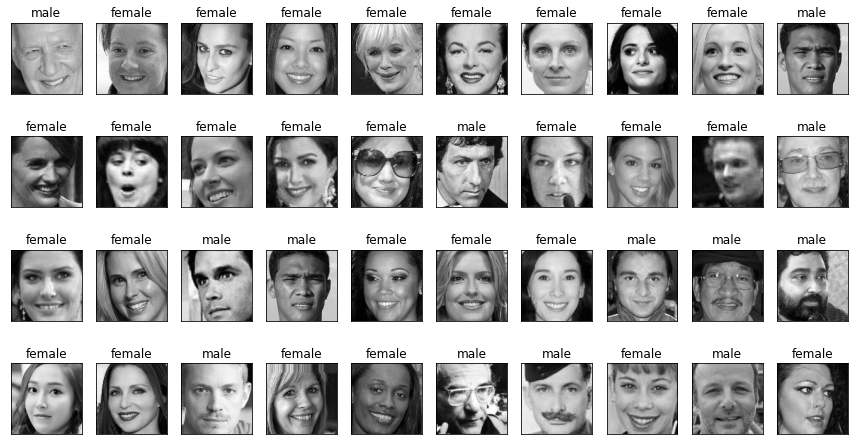

====================Eigen Images====================


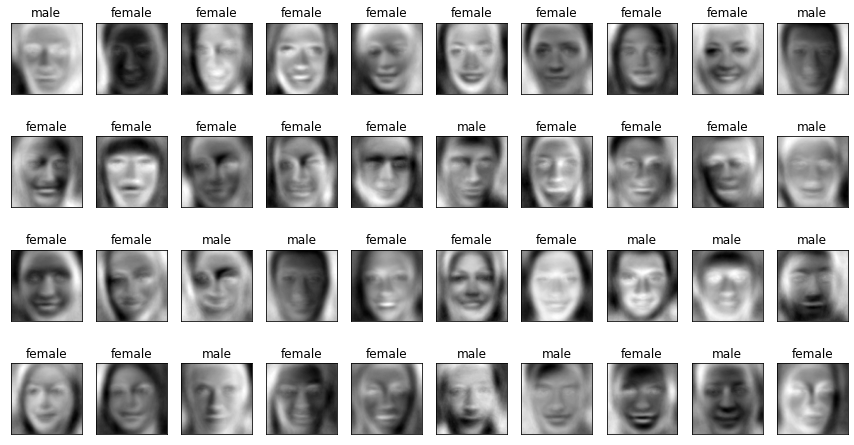

In [41]:
np.random.seed(1001)
pics = np.random.randint(0,4558,40)
plt.figure(figsize = (15,8))
for i,pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = X[pic:pic+1].reshape(100,100)
    plt.imshow(img,cmap='gray')
    plt.title('{}'.format(y[pic]))
    plt.xticks([])
    plt.yticks([])
plt.show()

print("="*20+'Eigen Images'+"="*20)
plt.figure(figsize = (15,8))
for i,pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = pca_data_inv[pic:pic+1].reshape(100,100)
    plt.imshow(img,cmap='gray')
    plt.title('{}'.format(y[pic]))
    plt.xticks([])
    plt.yticks([])
plt.show()